In [1]:
# a=['id_sitio',
# 'corte_evento',
# 'Daily_Date',
# 'VolUnCorrected',
# 'VolCorrected',
# 'Pressure',
# 'Temperature',
# 'MaxPressure',
# 'MaxPressureTime',
# 'MinPressure',
# 'MinPressureTime',
# 'MaxFlow',
# 'maxFlowTime',
# 'MinFlow',
# 'MinFlowTime',
# 'MaxTemp',
# 'maxTempTime',
# 'MinTemp',
# 'MinTempTime',
# 'id_RTU']

In [2]:
import pandas as pd


In [3]:
def mytabla(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val], axis=1)
    return mis_val_table

In [4]:
name = r"C:\Users\jibar\OneDrive - Universidad de los andes\Clases_Maestria\CIENCIA DE DATOS\Proyecto\General\General\Data\Daily.csv"

data =pd.read_csv(name,sep='|',error_bad_lines=False, warn_bad_lines= False,index_col=False,header=0, low_memory=False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396887 entries, 0 to 396886
Data columns (total 20 columns):
id_sitio           396887 non-null int64
corte_evento       396887 non-null bool
Daily_Date         396887 non-null object
VolUnCorrected     396835 non-null object
VolCorrected       396818 non-null object
Pressure           396503 non-null object
Temperature        396503 non-null object
MaxPressure        9114 non-null float64
MaxPressureTime    9114 non-null object
MinPressure        9114 non-null float64
MinPressureTime    9114 non-null object
MaxFlow            9114 non-null float64
maxFlowTime        9114 non-null object
MinFlow            9114 non-null float64
MinFlowTime        9114 non-null object
MaxTemp            9114 non-null float64
maxTempTime        9114 non-null object
MinTemp            9114 non-null float64
MinTempTime        9114 non-null object
id_RTU             396625 non-null float64
dtypes: bool(1), float64(7), int64(1), object(11)
memory usage: 57.9+

In [6]:
data.head()


,id_sitio,corte_evento,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MaxPressureTime,MinPressure,MinPressureTime,MaxFlow,maxFlowTime,MinFlow,MinFlowTime,MaxTemp,maxTempTime,MinTemp,MinTempTime,id_RTU
0,34,False,2013-08-19 23:59:59,"39,390000000000001","727,25",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,81.0
1,163,False,2013-08-21 23:59:59,"1434,9300000000001","24170,799999999999",NaN,NaN,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,3.0
2,40,False,2013-08-19 23:59:59,"7709,2600000000002","69097,570000000007",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,98.0
3,41,False,2013-08-19 23:59:59,"404,13999999999999","7004,7700000000004",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,89.0
4,50,False,2013-08-19 23:59:59,"3296,0100000000002","15331,190000000001",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,87.0


In [30]:
# mytabla(data)

In [8]:
data['MaxPressure'].value_counts()

0.0    9114
Name: MaxPressure, dtype: int64

In [9]:
def eliminar_coma(x):
    x=str(x).replace(',','.')
    return x

In [10]:

data['VolUnCorrected']=data['VolUnCorrected'].apply(eliminar_coma)
data['VolCorrected']=data['VolCorrected'].apply(eliminar_coma)
data['Pressure']=data['Pressure'].apply(eliminar_coma)
data['Temperature']=data['Temperature'].apply(eliminar_coma)


convert = {'id_sitio':'object',
          'VolUnCorrected':float,
          'VolCorrected':float,
          'Pressure':float,
          'Temperature':float,
          'MaxPressure':float,
          'MinPressure':float,
          'MaxFlow':float,
          'MinFlow':float,
          'MaxTemp':float,
          'MinTemp':float,
          'id_RTU':'object'}
data = data.astype(convert)

## desde este punto se puede entender mejor lo que hay en la BD

In [11]:
data.dtypes

id_sitio            object
corte_evento          bool
Daily_Date          object
VolUnCorrected     float64
VolCorrected       float64
Pressure           float64
Temperature        float64
MaxPressure        float64
MaxPressureTime     object
MinPressure        float64
MinPressureTime     object
MaxFlow            float64
maxFlowTime         object
MinFlow            float64
MinFlowTime         object
MaxTemp            float64
maxTempTime         object
MinTemp            float64
MinTempTime         object
id_RTU              object
dtype: object

In [12]:
mytabla(data)

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes
id_sitio,0.000000,0.000000,object,306
corte_evento,0.000000,100.000000,bool,1
Daily_Date,0.000000,0.000000,object,1907
VolUnCorrected,0.013102,5.477126,float64,114051
VolCorrected,0.017385,5.358452,float64,243108
Pressure,0.096753,1.574756,float64,21409
Temperature,0.096753,1.444492,float64,4189
MaxPressure,97.703628,2.296372,float64,1
MaxPressureTime,97.703628,0.000000,object,92
MinPressure,97.703628,2.296372,float64,1


In [13]:
numer = data.select_dtypes([float])
objeto= data.select_dtypes(['object'])

In [14]:
numer.describe()

,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MinPressure,MaxFlow,MinFlow,MaxTemp,MinTemp
count,3.968350e+05,3.968180e+05,396503.000000,396503.000000,9114.0,9114.0,9114.0,9114.0,9114.0,9114.0
mean,1.216840e+03,9.826752e+03,248.663777,133.917558,0.0,0.0,0.0,0.0,0.0,0.0
std,1.063920e+04,1.484636e+05,8153.008768,8448.443746,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.546729e+04,-2.600752e+05,-32.060000,-341.580000,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.397600e+02,1.271537e+03,58.110000,23.740000,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.510000e+02,2.965040e+03,100.170000,26.170000,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.370000e+02,8.109000e+03,232.630000,27.820000,0.0,0.0,0.0,0.0,0.0,0.0
max,1.328520e+06,5.224940e+07,994634.000000,991372.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
numer['MaxTemp'].value_counts()

0.0    9114
Name: MaxTemp, dtype: int64

In [15]:
objeto.describe()

,id_sitio,Daily_Date,MaxPressureTime,MinPressureTime,maxFlowTime,MinFlowTime,maxTempTime,MinTempTime,id_RTU
count,396887,396887,9114,9114,9114,9114,9114,9114,396625.0
unique,306,1907,92,92,92,92,92,92,310.0
top,166,2017-11-16 23:59:59,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,2013-11-01 00:00:00,163.0
freq,1621,461,258,258,258,258,258,258,4393.0


In [16]:
import matplotlib.pyplot as plt

c:\users\jibar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jibar\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


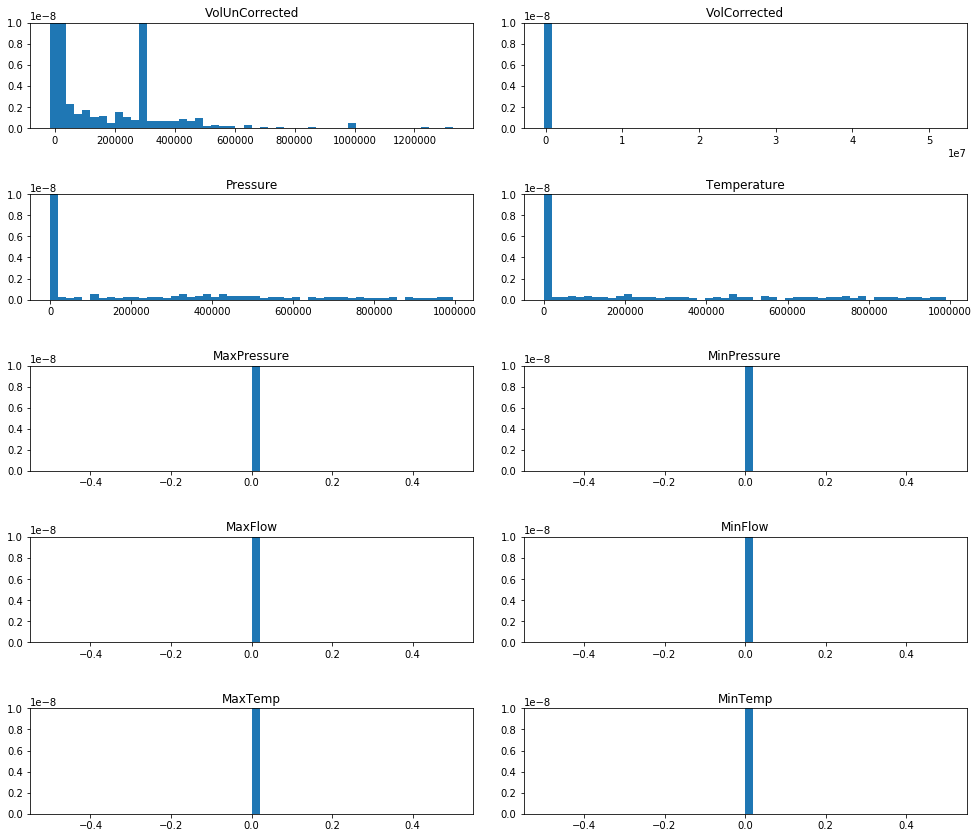

In [18]:
fig =plt.figure(figsize=(14,12))
cont = 0 
for i in numer.columns:
    cont+=1
    ax = plt.subplot(5,2,cont)
    plt.hist(numer[i], bins=50, density=True)
    ax.title.set_text(i)
    plt.ylim(0, 0.00000001)# modificar a 1 para ver la totalidad
fig.tight_layout(pad=2.0)

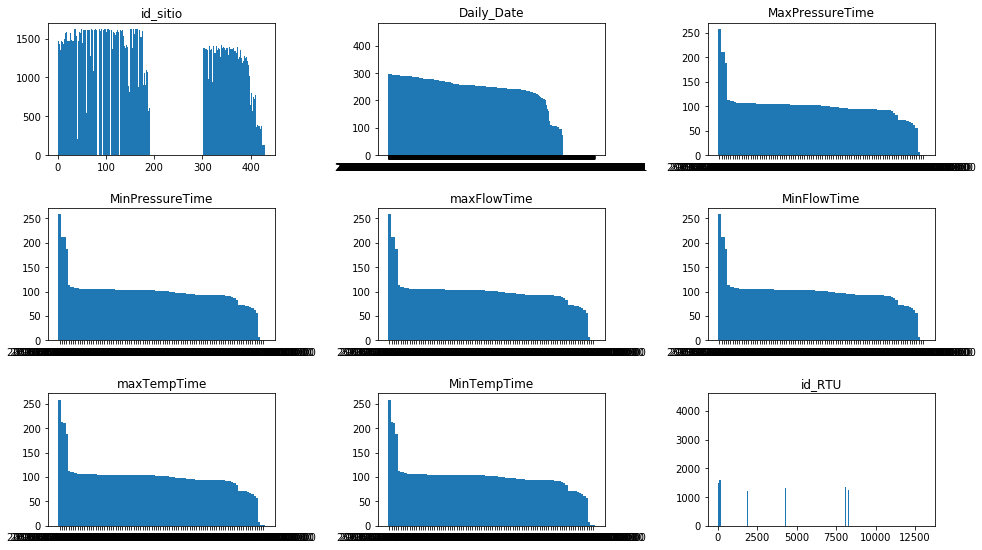

In [19]:
fig = plt.figure(figsize = (14,8))
for j,i in enumerate(objeto.columns):
#     print(j+1,i)
    ax = plt.subplot(3,3,j+1)
    plt.bar(x = objeto[i].value_counts().index,height=objeto[i].value_counts().values,   width=1.2)
    ax.title.set_text(i)
fig.tight_layout(pad=2.0)

<BarContainer object of 310 artists>

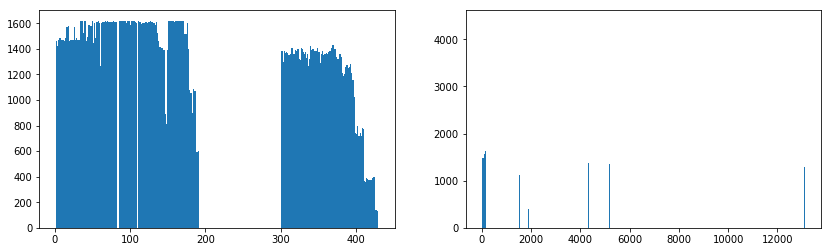

In [36]:
plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.bar(x = objeto['id_sitio'].value_counts().index,height=objeto['id_sitio'].value_counts().values,   width=2)

plt.subplot(1,2,2)
plt.bar(x = objeto['id_RTU'].value_counts().index,height=objeto['id_RTU'].value_counts().values,   width=1.2)

In [28]:
numer.corr()

,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MinPressure,MaxFlow,MinFlow,MaxTemp,MinTemp
VolUnCorrected,1.000000,0.032361,0.002088,0.001746,NaN,NaN,NaN,NaN,NaN,NaN
VolCorrected,0.032361,1.000000,-0.000632,-0.000868,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,0.002088,-0.000632,1.000000,0.729668,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.001746,-0.000868,0.729668,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
MaxPressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinPressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


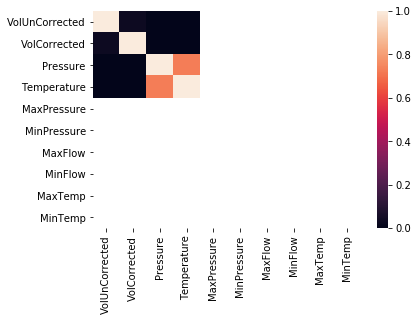

In [27]:

import seaborn as sns
sns.heatmap(numer.corr())

In [25]:
numer.corr(method ='spearman')

,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MinPressure,MaxFlow,MinFlow,MaxTemp,MinTemp
VolUnCorrected,1.000000,0.866719,-0.083246,0.016551,NaN,NaN,NaN,NaN,NaN,NaN
VolCorrected,0.866719,1.000000,0.320090,0.081383,NaN,NaN,NaN,NaN,NaN,NaN
Pressure,-0.083246,0.320090,1.000000,0.161894,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.016551,0.081383,0.161894,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
MaxPressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinPressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinFlow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


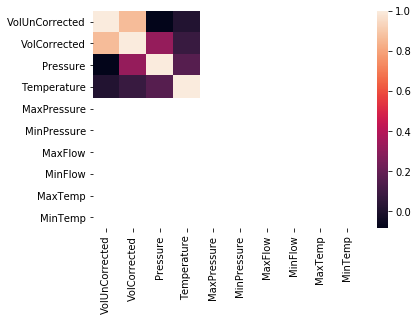

In [29]:
sns.heatmap(numer.corr(method ='spearman'))